# Results for Dataset3

Author: Xiaolong Liu & Kedong Chen

Created: Nov 26, 2023

# In this notebook, we will show the results in Experiment for Dataset3.ipynb.

# Setting up

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.datasets as datasets
from torchvision.transforms import ToTensor
import torch.nn as nn
import torch.nn.functional as F
# Use this to calculate the execution time
import time
import torchvision.transforms as transforms
import pandas as pd

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

cifar_trainset = datasets.CIFAR10(root='./data/CIFAR10', train=True, download=True, transform=transform)
cifar_testset = datasets.CIFAR10(root='./data/CIFAR10', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
def get_train_test_loader(trainset, testset, batch_size = 64, random_seed = 123):
    """
    inputs: 
        trainset: train data (from torchvision)
        testset: test data (from torchvision)
        batch_size: number of data points in a batch
        random_seed: random seed to make the results reproducible
    returns: 
        trainloader: iteratable object with batches of train data
        testloader: iteratable object with batches of test data
    """
    torch.manual_seed(random_seed)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size = batch_size,
                                              shuffle = True, num_workers=8)
    testloader = torch.utils.data.DataLoader(testset, batch_size = batch_size,
                                             shuffle = False, num_workers=8)
    return trainloader, testloader

In [4]:
def accuracy(net, dataloader):
    """
    inputs:
        net: trained neural network
        dataloader: trainloader or testloader
    outputs:
        accuracy: accuracy of the trained network for the given data
    """
    # torch.no_grad() suppresses the computation of the gradient and speeds things up
    correct = 0
    total = 0
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct/total
    return accuracy

In [5]:
batch_size_use = 10
random_seed_use = 1234
trainloader_10, testloader_10 = get_train_test_loader(cifar_trainset, cifar_testset, batch_size=batch_size_use,
                                                random_seed=random_seed_use)
batch_size_use = 100
random_seed_use = 1234
trainloader_100, testloader_100 = get_train_test_loader(cifar_trainset, cifar_testset, batch_size=batch_size_use,
                                                random_seed=random_seed_use)
batch_size_use = 1000
random_seed_use = 1234
trainloader_1000, testloader_1000 = get_train_test_loader(cifar_trainset, cifar_testset, batch_size=batch_size_use,
                                                random_seed=random_seed_use)

In [6]:
class Net_1(nn.Module):
    """
    A Neural network with three fc layers
    """
    def __init__(self):
        super(Net_1, self).__init__()
        self.fc1 = nn.Linear(3072, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 10)
        self.loss = nn.CrossEntropyLoss() 

    def forward(self, z):
        """
        inputs:
            z: input for neural net (feature vector or a batch of features)
        outputs:
            output: given the current values of the neural net
               parameters, calculates the output of the
               neural net for the input of z
        """
        
        z = z.view(z.shape[0], -1)
        z = F.relu(self.fc1(z))
        z = F.relu(self.fc2(z))
        output = self.fc3(z)

        return output

In [7]:
class Net_2(nn.Module):
    """
    A Neural network with two convolution layers(with pooling) and three fully connected layers. 
    Note that nn.CrossEntropyLoss() has already realized softmax, so we do not need use softmax in forward()
    """
    def __init__(self):
        super(Net_2, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.loss = nn.CrossEntropyLoss() 

    def forward(self, z):
        """
        inputs:
            z: input for neural net (feature vector or a batch of features)
        outputs:
            output: given the current values of the neural net
               parameters, calculates the output of the
               neural net for the input of z
        """
        
        z = self.pool(F.relu(self.conv1(z)))
        z = self.pool(F.relu(self.conv2(z)))
        z = z.view(-1, 16 * 5 * 5)
        z = F.relu(self.fc1(z))
        z = F.relu(self.fc2(z))
        output = self.fc3(z)

        return output

In [8]:
class Net_3(nn.Module):
    """
    A Neural network with two convolution layers(with pooling) and three fully connected layers. 
    Note that nn.CrossEntropyLoss() has already realized softmax, so we do not need use softmax in forward()
    """
    def __init__(self):
        super(Net_3, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.loss = nn.CrossEntropyLoss() 

    def forward(self, z):
        """
        inputs:
            z: input for neural net (feature vector or a batch of features)
        outputs:
            output: given the current values of the neural net
               parameters, calculates the output of the
               neural net for the input of z
        """
        
        z = self.pool(torch.tanh(self.conv1(z)))
        z = self.pool(torch.tanh(self.conv2(z)))
        z = z.view(-1, 16 * 5 * 5)
        z = torch.tanh(self.fc1(z))
        z = torch.tanh(self.fc2(z))
        output = self.fc3(z)

        return output

In [9]:
class Net_4(nn.Module):
    """
    A Neural network with two convolution layers(with pooling) and three fully connected layers. 
    Note that nn.CrossEntropyLoss() has already realized softmax, so we do not need use softmax in forward()
    """
    def __init__(self):
        super(Net_4, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1) 
        self.bn1 = nn.BatchNorm2d(32)               
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1) 
        self.bn2 = nn.BatchNorm2d(64)               
        self.pool = nn.MaxPool2d(2, 2)              
        self.fc1 = nn.Linear(64 * 8 * 8, 512)       
        self.fc2 = nn.Linear(512, 10)   

    def forward(self, z):
        """
        inputs:
            z: input for neural net (feature vector or a batch of features)
        outputs:
            output: given the current values of the neural net
               parameters, calculates the output of the
               neural net for the input of z
        """
        
        z = self.pool(F.relu(self.bn1(self.conv1(z)))) 
        z = self.pool(F.relu(self.bn2(self.conv2(z)))) 
        z = z.view(-1, 64 * 8 * 8)                     
        z = F.relu(self.fc1(z))                        
        output = self.fc2(z)

        return output

# Load the networks and the results

In [10]:
net1_1 = torch.load("net1_1")
net1_2 = torch.load("net1_2")
net1_3 = torch.load("net1_3")

net2_1 = torch.load("net2_1")
net2_2 = torch.load("net2_2")
net2_3 = torch.load("net2_3")

net3_1 = torch.load("net3_1")
net3_2 = torch.load("net3_2")
net3_3 = torch.load("net3_3")

net4_1 = torch.load("net4_1")
net4_2 = torch.load("net4_2")
net4_3 = torch.load("net4_3")

In [11]:
model1_result = pd.read_csv("model1_loss.csv", header=None)
model2_result = pd.read_csv("model2_loss.csv", header=None)
model3_result = pd.read_csv("model3_loss.csv", header=None)
model4_result = pd.read_csv("model4_loss.csv", header=None)
model4_3_result = pd.read_csv("model4_3_loss.csv", header=None)

# Compute the training and testing accuracy for each model

In [12]:
train_acc1_1 = accuracy(net1_1, trainloader_10)
test_acc1_1 = accuracy(net1_1, testloader_10)

In [13]:
train_acc1_2 = accuracy(net1_2, trainloader_100)
test_acc1_2 = accuracy(net1_2, testloader_100)

In [14]:
train_acc1_3 = accuracy(net1_3, trainloader_1000)
test_acc1_3 = accuracy(net1_3, testloader_1000)

In [15]:
train_acc2_1 = accuracy(net2_1, trainloader_10)
test_acc2_1 = accuracy(net2_1, testloader_10)

/Users/always/opt/anaconda3/envs/pytorch/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1623459065530/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [16]:
train_acc2_2 = accuracy(net2_2, trainloader_100)
test_acc2_2 = accuracy(net2_2, testloader_100)

In [17]:
train_acc2_3 = accuracy(net2_3, trainloader_1000)
test_acc2_3 = accuracy(net2_3, testloader_1000)

In [18]:
train_acc3_1 = accuracy(net3_1, trainloader_10)
test_acc3_1 = accuracy(net3_1, testloader_10)

In [19]:
train_acc3_2 = accuracy(net3_2, trainloader_100)
test_acc3_2 = accuracy(net3_2, testloader_100)

In [20]:
train_acc3_3 = accuracy(net3_3, trainloader_1000)
test_acc3_3 = accuracy(net3_3, testloader_1000)

In [21]:
train_acc4_1 = accuracy(net4_1, trainloader_10)
test_acc4_1 = accuracy(net4_1, testloader_10)

In [22]:
train_acc4_2 = accuracy(net4_2, trainloader_100)
test_acc4_2 = accuracy(net4_2, testloader_100)

In [23]:
train_acc4_3 = accuracy(net4_3, trainloader_1000)
test_acc4_3 = accuracy(net4_3, testloader_1000)

In [24]:
import csv

# Your data
data = [
    [train_acc1_1, test_acc1_1,train_acc1_2, test_acc1_2,train_acc1_3, test_acc1_3],
    [train_acc2_1, test_acc2_1,train_acc2_2, test_acc2_2,train_acc2_3, test_acc2_3],
    [train_acc3_1, test_acc3_1,train_acc3_2, test_acc3_2,train_acc3_3, test_acc3_3],
    [train_acc4_1, test_acc4_1,train_acc4_2, test_acc4_2,train_acc4_3, test_acc4_3]
]

# Open a file to write
with open('accuracy.csv', 'w', newline='') as file:
    writer = csv.writer(file)

    # Write each row to the CSV file
    for row in data:
        writer.writerow(row)

### We documented the training loss at half-epoch intervals and plotted the logarithmic values of these losses for each model. This analysis led to a consistent observation: smaller batch sizes correlate with lower losses given the same number of epochs. Notably, with a batch size of 10, the loss exhibited a zigzag pattern, unlike the smoother trends observed with larger batch sizes. This pattern suggests that using smaller batch sizes introduces more randomness into the training process.

### The logarithmic losses for each model, standardized to the same batch size, are depicted in Figure \ref{fig:log loss compare}. As anticipated, Model 4 registers the lowest and most rapidly decreasing loss among all models. Intriguingly, when the batch size is set to 1000, using Tanh as an activation function seems to result in a faster reduction in loss compared to ReLU. Model 1 outperforms Models 2 and 3, likely attributable to its higher parameter count. This trend underscores the general principle that models with more parameters tend to achieve lower training losses, though they also carry a higher risk of overfitting.

In [81]:
plt.plot(np.log(model1_result.iloc[0]), label="batchsize=10")
plt.plot(np.log(model1_result.iloc[1]), label="batchsize=100")
plt.plot(np.log(model1_result.iloc[2]), label="batchsize=1000")
plt.title("log loss of model1(against half epoch)")
plt.legend()
plt.show()

In [82]:
plt.plot(np.log(model2_result.iloc[0]), label="batchsize=10")
plt.plot(np.log(model2_result.iloc[1]), label="batchsize=100")
plt.plot(np.log(model2_result.iloc[2]), label="batchsize=1000")
plt.title("log loss of model2(against half epoch)")
plt.legend()
plt.show()

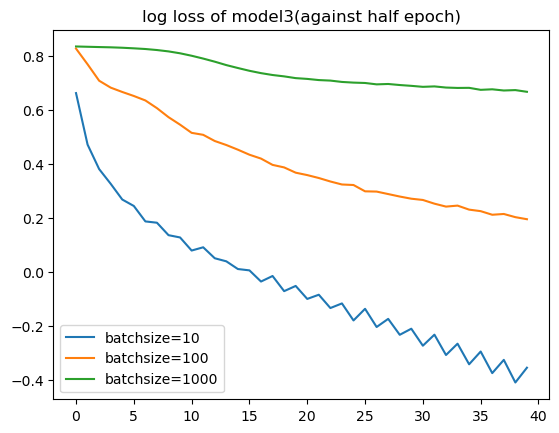

In [83]:
plt.plot(np.log(model3_result.iloc[0]), label="batchsize=10")
plt.plot(np.log(model3_result.iloc[1]), label="batchsize=100")
plt.plot(np.log(model3_result.iloc[2]), label="batchsize=1000")
plt.title("log loss of model3(against half epoch)")
plt.legend()
plt.show()

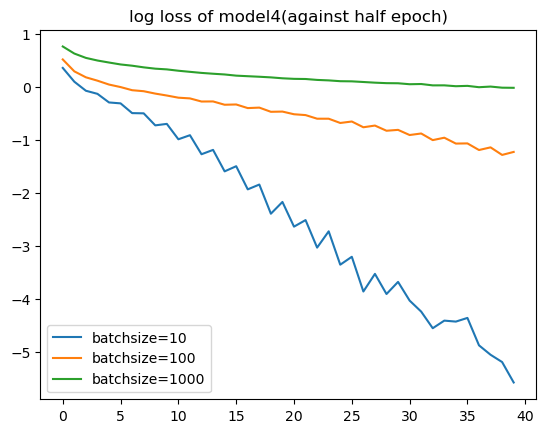

In [84]:
plt.plot(np.log(model4_result.iloc[0]), label="batchsize=10")
plt.plot(np.log(model4_result.iloc[1]), label="batchsize=100")
plt.plot(np.log(model4_3_result.iloc[0]), label="batchsize=1000")
plt.title("log loss of model4(against half epoch)")
plt.legend()
plt.show()

### The improved training outcomes observed with models having more parameters come at a cost of increased computational time. We examined this trade-off by plotting the logarithmic values of both the total and average per-update running times for each model configuration. As expected, models with more parameters tend to have longer total running times and higher average times per update. Additionally, larger batch sizes generally result in shorter running times. However, an anomaly was observed with Model 2, where the running time unexpectedly increased with larger batch sizes; this could potentially be attributed to memory constraints on my computer during training.

### Specifically, when the batch size is set to 10, the use of Tanh as an activation function incurs more time than ReLU, which aligns with the computational simplicity of ReLU. Interestingly, for Model 2, an increase in batch size from 100 to 1000 led to longer running times, further suggesting memory limitations during training.

### Additionally, there is a clear inverse relationship between batch size and total running time: as the batch size increases, the total running time, or equivalently, the running time per epoch, decreases.

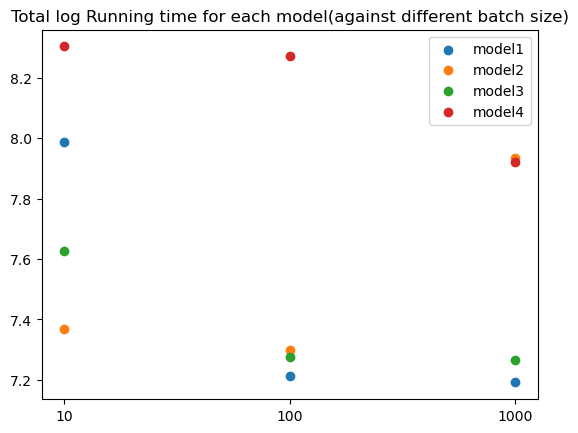

In [88]:
plt.scatter(["10","100","1000"], np.log(model1_result.iloc[3][0:3]), label="model1")
plt.scatter(["10","100","1000"], np.log(model2_result.iloc[3][0:3]), label="model2")
plt.scatter(["10","100","1000"], np.log(model3_result.iloc[3][0:3]), label="model3")
plt.scatter(["10","100","1000"], np.log([i for i in model4_result.iloc[2][0:2]] + [model4_3_result.iloc[1][0]]), label="model4")
plt.title("Total log Running time for each model(against different batch size)")
plt.legend()
plt.show()

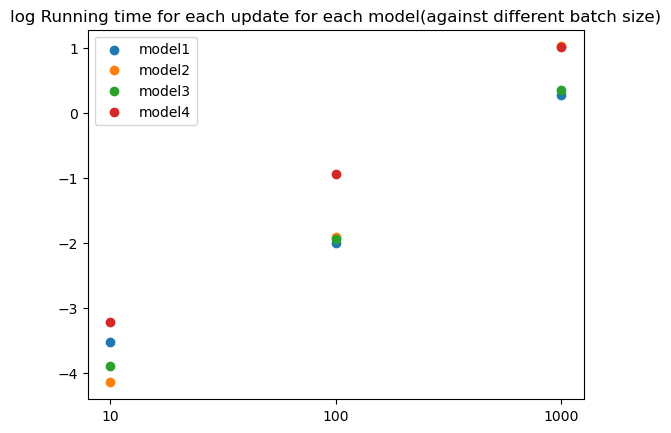

In [89]:
result_4 = [i for i in model4_result.iloc[2][0:2]] + [model4_3_result.iloc[1][0]]
plt.scatter(["10","100","1000"], np.log(model1_result.iloc[3][0:3] / [20*5000, 20*500, 20*50]), label="model1")
plt.scatter(["10","100","1000"], np.log(model2_result.iloc[3][0:3] / [20*5000, 20*500, 20*50]), label="model2")
plt.scatter(["10","100","1000"], np.log(model3_result.iloc[3][0:3] / [20*5000, 20*500, 20*50]), label="model3")
plt.scatter(["10","100","1000"], np.log([result_4[0]/(20*5000), result_4[1]/(20*500), result_4[2]/(20*50)]), label="model4")
plt.title("log Running time for each update for each model(against different batch size)")
plt.legend()
plt.show()

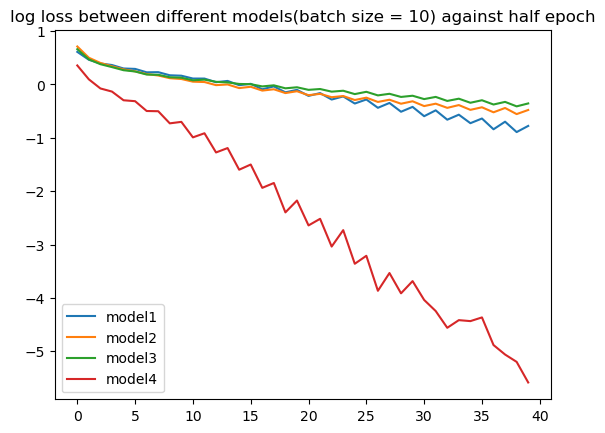

In [85]:
plt.plot(np.log(model1_result.iloc[0]), label="model1")
plt.plot(np.log(model2_result.iloc[0]), label="model2")
plt.plot(np.log(model3_result.iloc[0]), label="model3")
plt.plot(np.log(model4_result.iloc[0]), label="model4")
plt.title("log loss between different models(batch size = 10) against half epoch")
plt.legend()
plt.show()

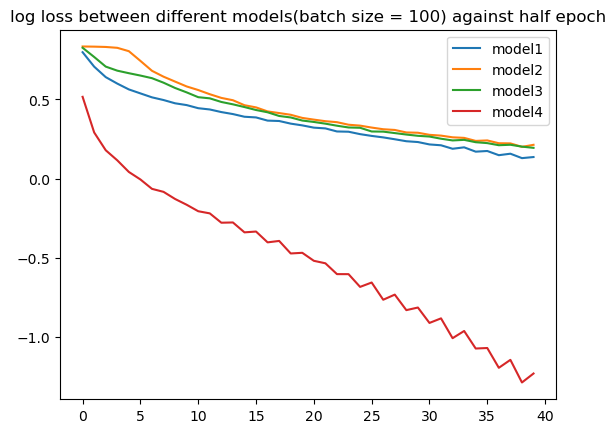

In [86]:
plt.plot(np.log(model1_result.iloc[1]), label="model1")
plt.plot(np.log(model2_result.iloc[1]), label="model2")
plt.plot(np.log(model3_result.iloc[1]), label="model3")
plt.plot(np.log(model4_result.iloc[1]), label="model4")
plt.title("log loss between different models(batch size = 100) against half epoch")
plt.legend()
plt.show()

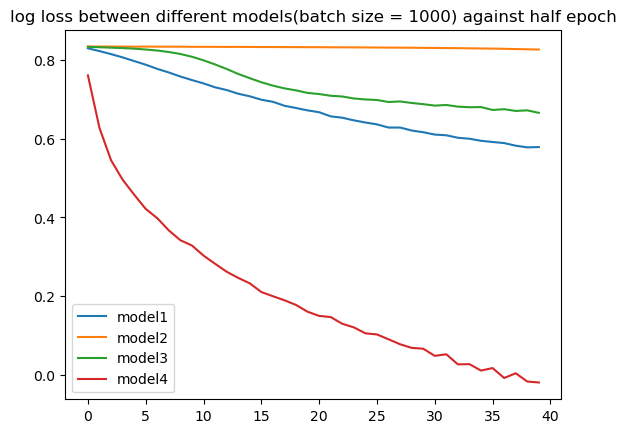

In [87]:
plt.plot(np.log(model1_result.iloc[2]), label="model1")
plt.plot(np.log(model2_result.iloc[2]), label="model2")
plt.plot(np.log(model3_result.iloc[2]), label="model3")
plt.plot(np.log(model4_3_result.iloc[0]), label="model4")
plt.title("log loss between different models(batch size = 1000) against half epoch")
plt.legend()
plt.show()

### Our results indicate that Model 4 outperforms the others in terms of accuracy on both training and testing datasets. This superior performance aligns with its significantly higher parameter count (2,122,378), suggesting a more complex model capacity. Across all models, training accuracies generally exceed testing accuracies, with the exception of Model 3 at a batch size of 1000. Notably, Model 4 achieved the highest testing accuracy of approximately 0.774, but its training accuracy was a remarkable 0.9997, raising concerns about potential overfitting.

### While extending the number of epochs or employing more sophisticated network architectures might improve testing accuracy, computational limitations preclude such explorations in this study. Nevertheless, our findings reveal some intriguing patterns and insights, despite these constraints.

### The results reveal a notable trend: as the batch size increases, there's a significant decrease in accuracy within the fixed epoch constraint. This observation is logical considering the update frequency of the model. For instance, with a batch size of 10, the model undergoes 5000 updates per epoch, totaling 100,000 updates across 20 epochs. Conversely, at a batch size of 1000, the update frequency drops to just 50 updates per epoch, or 1000 updates in total for 20 epochs. This variance in updates suggests that the data points are not highly similar to each other; otherwise, fewer updates might still have sufficed to achieve higher accuracy.

### Comparing Model 3 with Model 2 reveals no significant benefit in substituting Tanh for ReLU as the activation function. Additionally, despite Model 1 having a substantial number of parameters (1,640,330), its improvement in accuracy is not particularly pronounced when compared to the other models.

In [80]:
data

[[0.8758, 0.5402, 0.61768, 0.5352, 0.37632, 0.3758],
 [0.81096, 0.6447, 0.5714, 0.5533, 0.18814, 0.1881],
 [0.798, 0.6233, 0.576, 0.5595, 0.2932, 0.2987],
 [0.99974, 0.774, 0.94042, 0.7487, 0.67052, 0.6441]]

In [ ]:
[1640330, 62006, 62006, 2122378]

# Discussion

### $\bullet$ Using SGD for network training, smaller batch sizes result in more frequent updates per epoch. Consequently, while completing an epoch may take longer with smaller batches, each update is quicker. Importantly, with a fixed number of epochs, smaller batch sizes tend to yield lower training losses.

### $\bullet$ In network design, the judicious selection of parameters plays a crucial role. A model with a well-considered number of parameters is more likely to achieve lower training losses and potentially higher testing accuracy. However, it is important to balance this with vigilance against overfitting and consideration of computational constraints.

### $\bullet$ Generally, substituting Tanh for ReLU does not offer significant benefits and may increase computational costs. However, this additional cost tends to be less substantial with larger batch sizes.

### $\bullet$ While our current testing accuracy falls short of expectations, there are promising avenues for improvement. Developing a more sophisticated model, potentially inspired by contemporary research in the field, could yield better results. Additionally, extending the number of training epochs may further enhance performance. However, these advancements hinge on access to more powerful computing resources, underscoring the need for an upgraded server to facilitate these enhancements.
